In [3]:
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
from matplotlib import colors
import cv2 


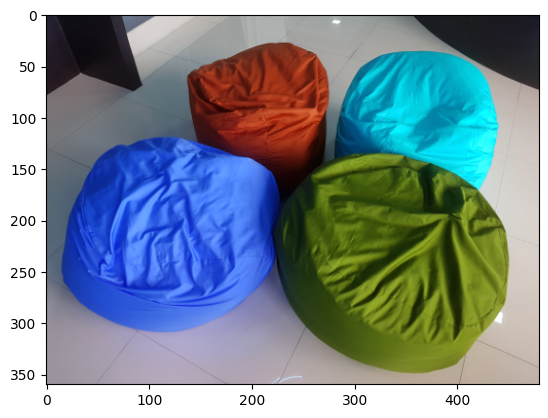

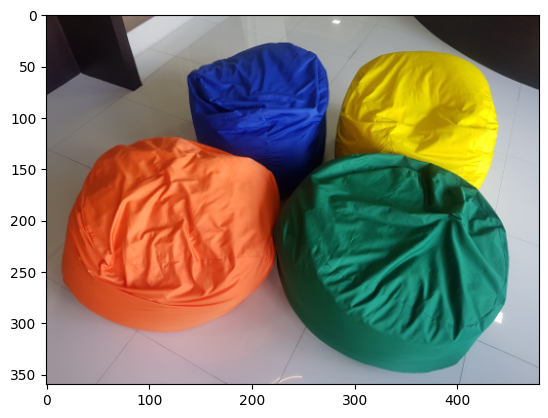

In [6]:
img = cv2.imread('bags.png')
plt.imshow(img)
plt.show()
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

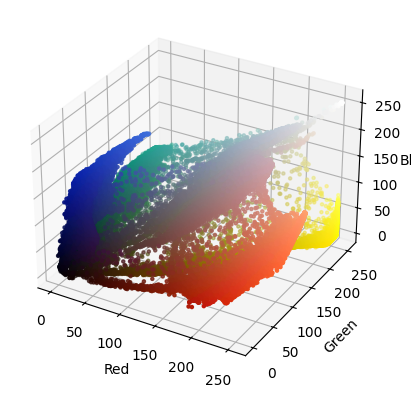

In [7]:
r, g, b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1],3))
norm = colors.Normalize(vmin = -1. , vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(),g.flatten(), b.flatten(), facecolors = pixel_colors, marker =".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

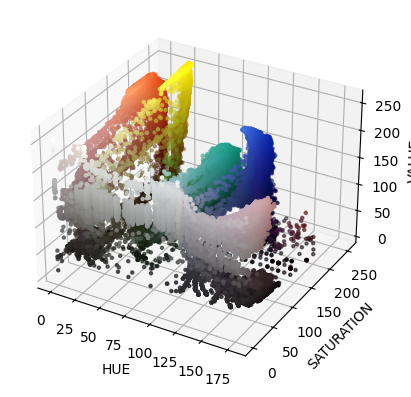

In [8]:
hsv_img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection = "3d")
axis.scatter(h.flatten(),s.flatten(),v.flatten(),facecolors=pixel_colors,marker=".")
axis.set_xlabel("HUE")
axis.set_ylabel("SATURATION")
axis.set_zlabel("VALUE")
plt.show()

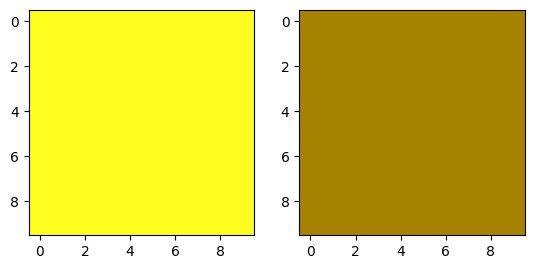

In [80]:
light_yellow = (255, 254, 30)
dark_yellow = (166, 130, 1)

from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), light_yellow, dtype=np.uint8) /255.0
do_square = np.full((10, 10, 3), dark_yellow, dtype=np.uint8) /255.0
plt.subplot(1, 2, 1)
plt.imshow(lo_square)
plt.subplot(1, 2, 2)
plt.imshow(do_square)
plt.show()


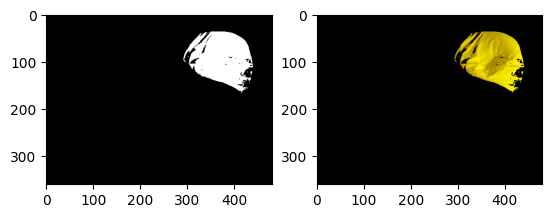

In [94]:
mask = cv2.inRange(img,dark_yellow,light_yellow)
result_1  = cv2.bitwise_and(img,img,mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_1)
plt.show()

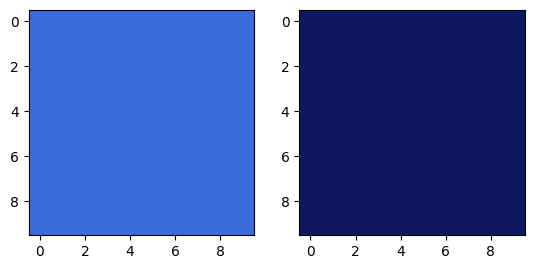

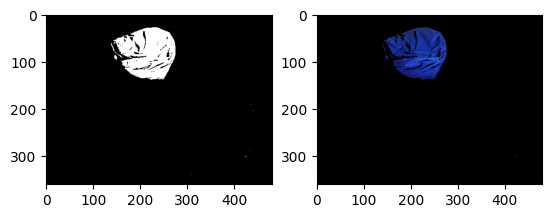

In [93]:
light_blue = (60, 108, 218)
dark_blue = (13, 24, 97)
from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) /255.0
do_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) /255.0
plt.subplot(1, 2, 1)
plt.imshow(lo_square)
plt.subplot(1, 2, 2)
plt.imshow(do_square)
plt.show()

mask = cv2.inRange(img,dark_blue,light_blue)
result_2  = cv2.bitwise_and(img,img,mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_2)
plt.show()

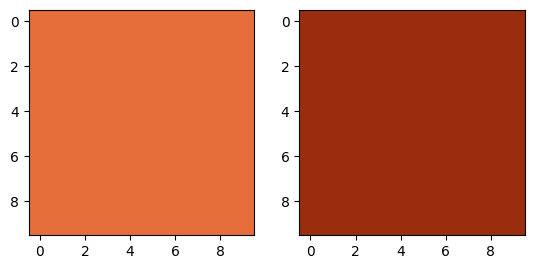

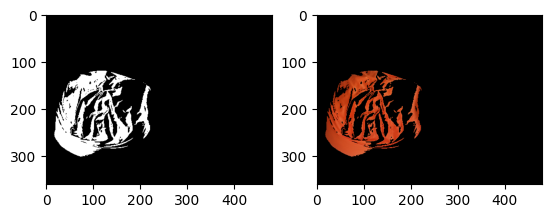

In [95]:
light_orange = (230, 110, 59)
dark_orange = (153, 45, 13)
from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) /255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) /255.0
plt.subplot(1, 2, 1)
plt.imshow(lo_square)
plt.subplot(1, 2, 2)
plt.imshow(do_square)
plt.show()

mask = cv2.inRange(img,dark_orange,light_orange)
result_3  = cv2.bitwise_and(img,img,mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_3)
plt.show()

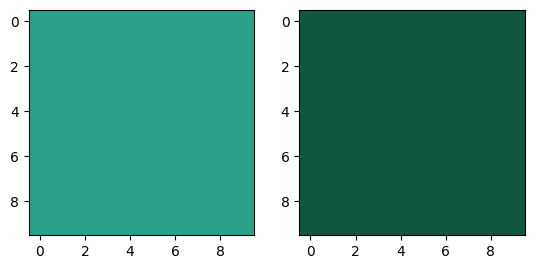

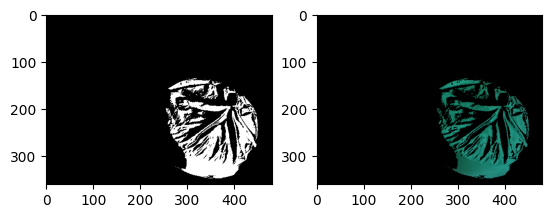

In [96]:
light_green = (41, 161, 137)
dark_green = (15, 87, 64)
from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), light_green, dtype=np.uint8) /255.0
do_square = np.full((10, 10, 3), dark_green, dtype=np.uint8) /255.0
plt.subplot(1, 2, 1)
plt.imshow(lo_square)
plt.subplot(1, 2, 2)
plt.imshow(do_square)
plt.show()

mask = cv2.inRange(img,dark_green,light_green)
result_4  = cv2.bitwise_and(img,img,mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_4)
plt.show()

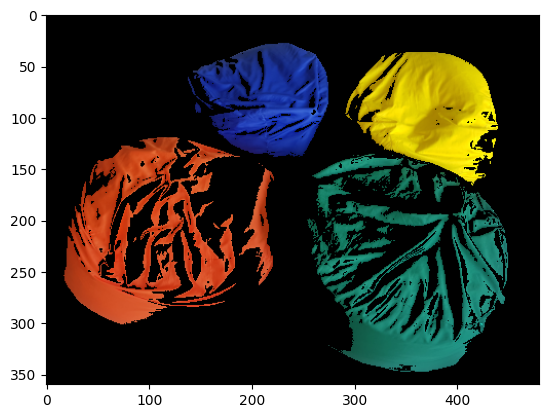

In [97]:
juntos= result_1 + result_2 + result_3 + result_4
plt.imshow(juntos)

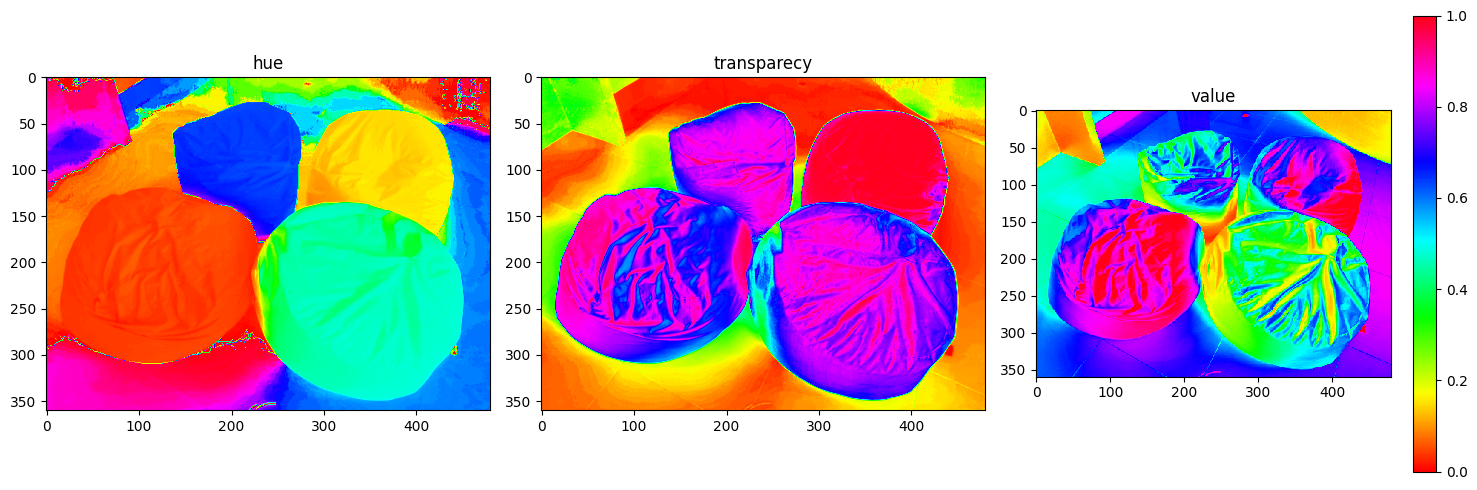

In [24]:
hsv_img = rgb2hsv(img)
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(hsv_img[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(hsv_img[:,:,1],cmap='hsv')
ax[1].set_title('transparecy')
ax[2].imshow(hsv_img[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(imshow(hsv_img[:,:,2],cmap='hsv'))
fig.tight_layout()
plt.show()


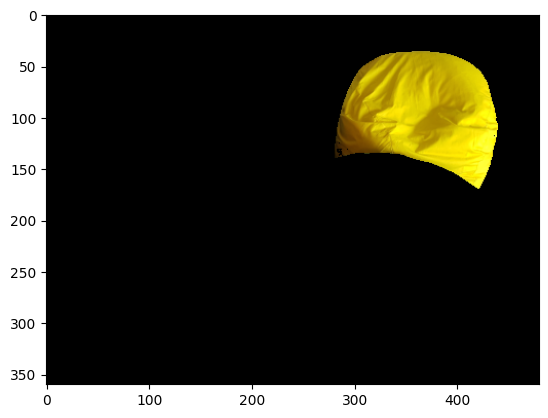

In [82]:
hsv_img = rgb2hsv(img)
lower_mask = hsv_img[:, :, 0] > 0.09
upper_mask = hsv_img[:, :, 0] < 0.18
saturation_mask = hsv_img[:, :, 1] > 0.7
mask2 = upper_mask * lower_mask * saturation_mask
red = img[:, :, 0] * mask2
green = img[:, :, 1] * mask2
blue = img[:, :, 2] * mask2
img_masked = np.dstack((red, green, blue))
plt.imshow(img_masked)
plt.show()



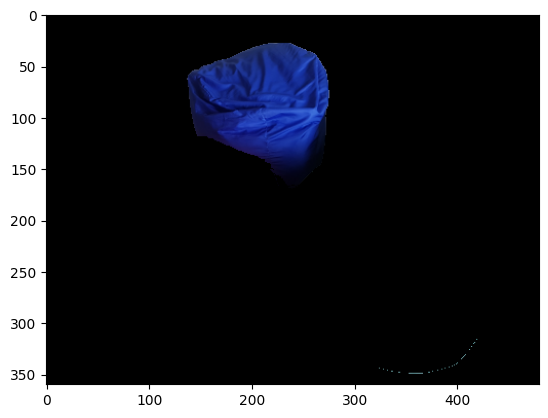

In [69]:
#SILLON AZUL 
hsv_img = rgb2hsv(img)
lower_mask = hsv_img[:,:,0] > 0.5
upper_mask = hsv_img[:,:,0] < 0.7
saturation_mask = hsv_img[:,:,1] > 0.4

mask2 = upper_mask*lower_mask*saturation_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2
img_masked = np.dstack((red, green, blue))
plt.imshow(img_masked)

plt.show()


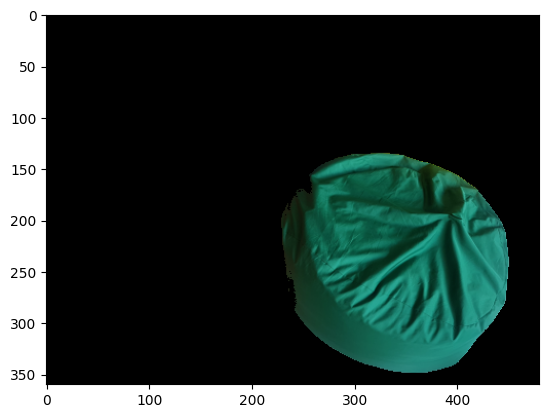

In [98]:
hsv_img = rgb2hsv(img)
lower_mask = hsv_img[:,:,0] > 0.2
upper_mask = hsv_img[:,:,0] < 0.5
saturation_mask = hsv_img[:,:,1] > 0.4

mask2 = upper_mask*lower_mask*saturation_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2
img_masked = np.dstack((red, green, blue))
plt.imshow(img_masked)
plt.show()


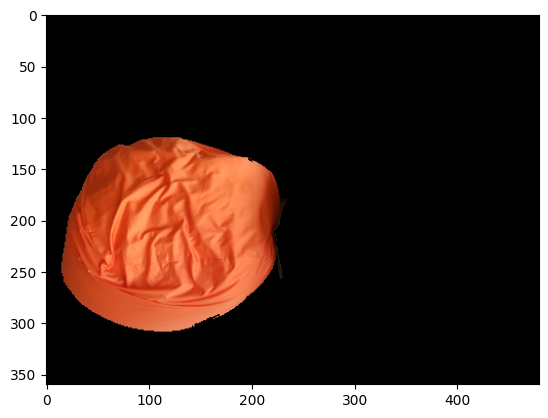

In [63]:
hsv_img = rgb2hsv(img)
lower_mask = hsv_img[:,:,0] > 0.0
upper_mask = hsv_img[:,:,0] < 0.08
saturation_mask = hsv_img[:,:,1] > 0.56

mask2 = upper_mask*lower_mask*saturation_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2
img_masked = np.dstack((red, green, blue))
plt.imshow(img_masked)
plt.show()


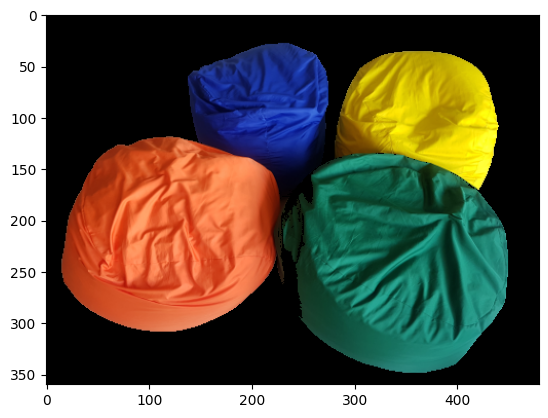

In [85]:
hsv_img = rgb2hsv(img)
lower_mask = hsv_img[:,:,0] > 0.0
upper_mask = hsv_img[:,:,0] < 1
saturation_mask = hsv_img[:,:,1] > 0.5

mask2 = upper_mask*lower_mask*saturation_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2
img_masked = np.dstack((red, green, blue))
plt.imshow(img_masked)
plt.show()